In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import random

# Setup train/test/valid

In [2]:
def separate_test_index(seed=9001,listlen=86,wantnum=7):
    random.seed(seed)
    # define test indices
    testint = ([random.randint(0, listlen-1) for _ in range(wantnum)])
    # list of all indices
    allint = [int(obj) for obj in np.linspace(0,listlen-1,listlen)]
    # filter test indices
    testvalidint = [obj for obj in allint if obj not in testint]
    return testint,testvalidint

In [3]:
# get test index and train-validation indices
testint,testvalidint = separate_test_index()
# Set up seed
random.seed(9001)
# get validation indices
validint = random.sample(testvalidint, 7)
# filter validation indices
trainint = [obj for obj in testvalidint if obj not in validint]

# Process data

In [10]:
path='C:\\Users\\fabau\OneDrive\\Documents\\GitHub\\master-project-cleaned\\data\\time_series_1h_EU\\instantaneous_10m_wind_gust\\instantaneous_10m_wind_gust_max.csv'
timeseries_df = pd.read_csv(path)

# drop the first column
timeseries_df = timeseries_df.drop(columns=[timeseries_df.columns[0]])

# drop the storm index, start date and name columns
timeseries_df = timeseries_df.drop(columns=['storm_index','start_date','storm_name'])

In [11]:
timeseries_df.to_numpy()[trainint,:].shape

(74, 15)

In [12]:
pca = PCA()
pca.fit(timeseries_df)

PCA()

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.71697623, 0.91712943, 0.95089541, 0.96629503, 0.97629115,
       0.98286672, 0.98780044, 0.99063833, 0.99303696, 0.99502971,
       0.99658111, 0.99774483, 0.99860572, 0.99941338, 1.        ])

In [14]:
pca.transform(timeseries_df)[0]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])

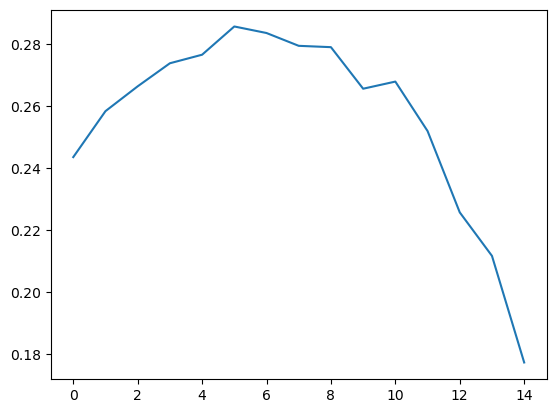

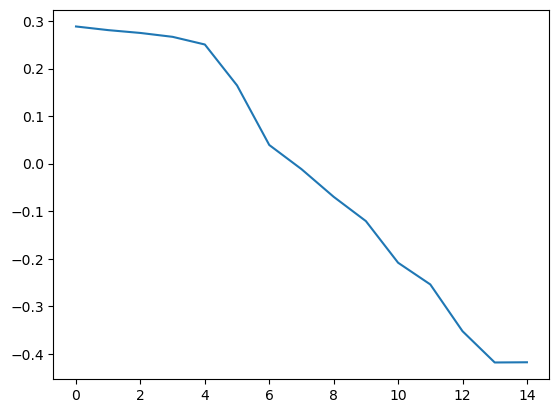

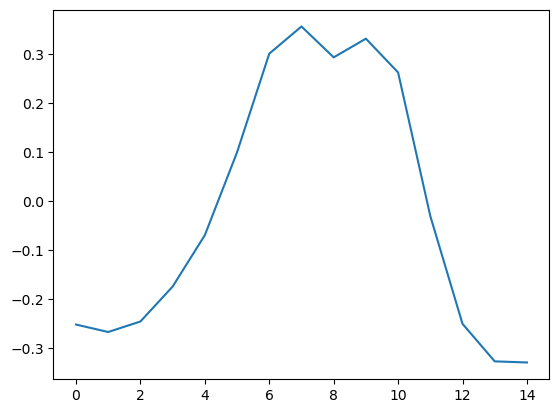

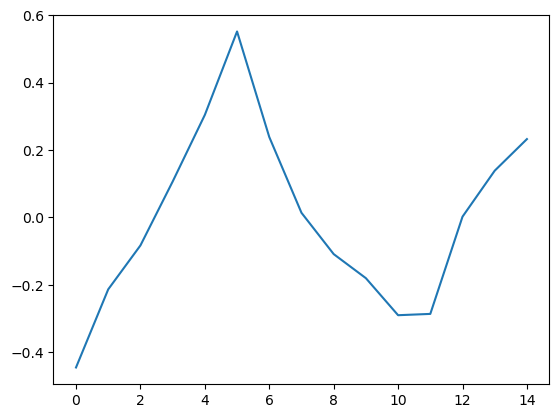

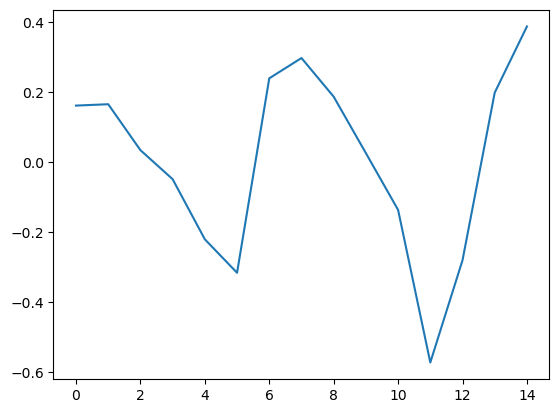

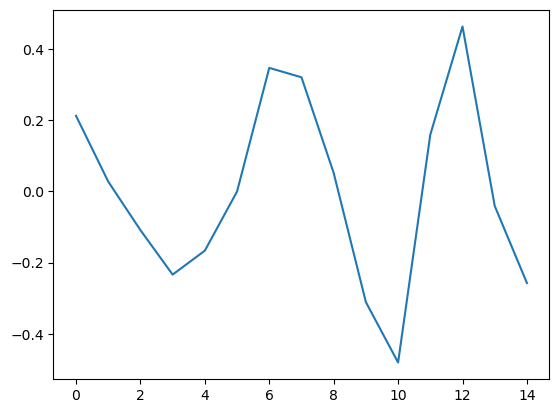

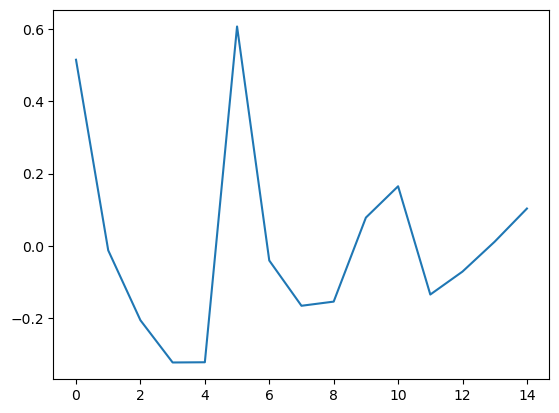

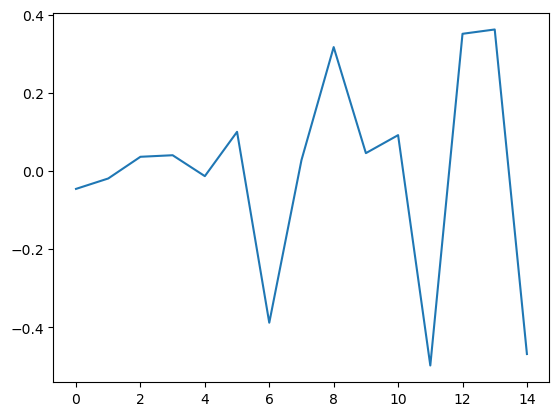

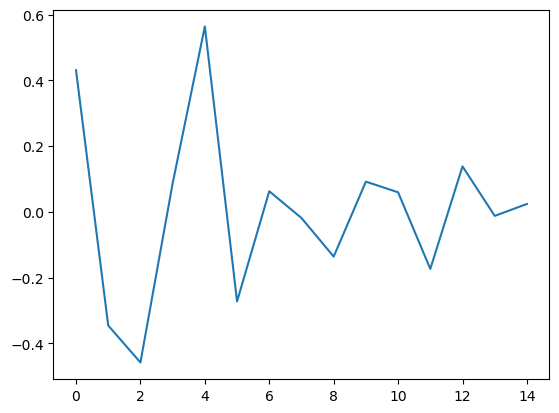

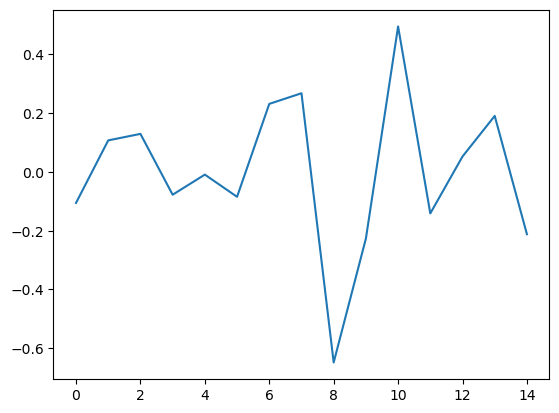

In [17]:
for i in range(0,10):
    plt.plot(pca.components_[i,...])
    plt.show()

In [18]:
pca.transform(timeseries_df)[0,...]

array([-37.13759997,  34.85490214, -10.87746436,  -6.35669557,
         1.62472942,  -4.27185197,  -5.76420661,  -1.41594356,
         3.86467777,  -0.11562375,   0.06023044,   1.16462664,
        -0.40961606,   0.27909208,  -0.74015035])